# Using Gradient Ascent

Sometimes we’re just interested in finding the global maximum for a function instead of all the local and global maxima and minima. For example, we might want to discover the angle of projection for which a ball will cover the maximum horizontal distance.

This approach makes use of the first derivative only, so it’s applicable only to functions for which the first derivative can be calculated. This method is called the _gradient ascent method_, which is an iterative approach to finding the global maximum. The method involves lots of computation, it’s the perfect kind of thing to solve programmatically rather than by hand.

$$t_{flight} = 2\dfrac{u\cdot \sin \theta}{g}$$

To calculate the time of flight for a body in projectile motion that’s thrown with a velocity $u$ at an angle $\theta$. The range of a projectile, $R$, is the total horizontal distance traveled by the projectile and is given by the product of $u_x \times t_{flight}$. So, we have:

$$ R = \cos \theta \times \dfrac{2u\cdot \cos \theta}{g}= \dfrac{u^2\sin (2\theta)}{g}$$


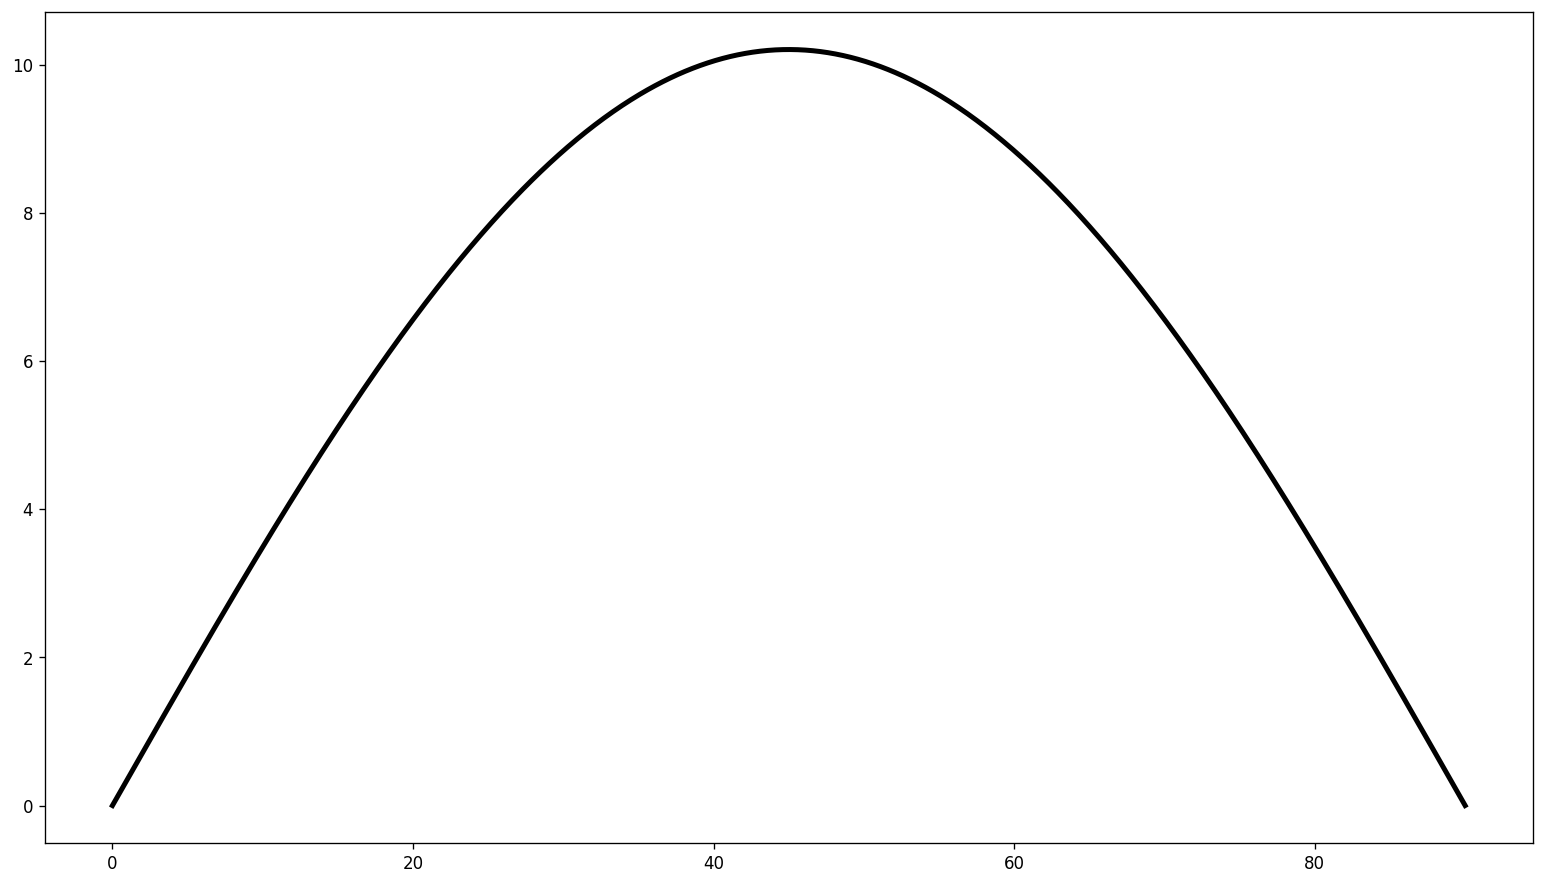

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 

dangle = 0.1
angle = np.arange(0,90+dangle,dangle)
u = 10
g = 9.8
R = (u**2 * np.sin(2*(np.pi*angle/180)))/g

# setup figure
fig = plt.figure(figsize=[16,9], dpi=120)
gs=gridspec.GridSpec(1,1)

ax=fig.add_subplot(gs[0,0])


#plt.xlim(x[0],x[-1])
#plt.xticks(np.concatenate([np.arange(-5,0,1), np.arange(1,6,1)]))

ax.plot(angle, R,'-k', linewidth=3)



plt.show()

The plot shows values of $\theta$ between $0$ and $90$ degrees and the corresponding range (distance traveled) for each angle. From the graph, we can see that the maximum range is obtained when the angle of projection is around 45 degrees. Now we can use the gradient ascent method to find this value of $\theta$ numerically.

The gradient ascent method is an iterative method: we start with an initial value of $\theta$ - say, 0.001, or $\theta_{old}$ = 0.001 - and gradually get closer to the value of $\theta$ that corresponds to the maximum range.

$$ \theta_{new} = \theta_{old} + \lambda \dfrac{dR}{d\theta}$$

where $\lambda$ is the step size.

We do the following:
1. Calculate $\theta_{new}$ using the preceding equation.
2. If the absolute difference $\theta_{new} - \theta_{old}$ is greater than a value, $\varepsilon$, we set $\theta_{aold} = \theta_{new}$ and return to step 1. Otherwise, we go to step 3.
3. $\theta_{new}$ is an approximate value of $\theta$ for which $R$ has the maximum value.

The value of epsilon ($\varepsilon$) determines when we decide to stop the iteration of the algorithm.

The following grad_ascent() function implements the gradient ascent algorithm.

In [10]:
import math
from sympy import Derivative, Symbol, sin

def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
        
    return x_new

def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max



g = 9.8

# Assume initial velocity
u = 25

# Expression for range
theta = Symbol('theta')
R = u**2*sin(2*theta)/g
theta_max = find_max_theta(R, theta)

print('Theta: {0}'.format(math.degrees(theta_max)))
print('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

Theta: 44.997815081691805
Maximum Range: 63.7755100185965


The value of θ is printed in degrees and turns out to be close to 45 degrees, as expected. If you change the initial velocity to other values, you’ll see that the angle of projection at which the maximum range is reached is always close to 45 degrees.

---

[Calculus Problems](calculus.ipynb)

[Main Page](../README.md)